In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 1 * x_0 + 2 * x_1 + 3

y = np.dot(X, np.array([1, 2])) + 3

reg = LinearRegression().fit(X, y)

reg.score(X, y)

1.0

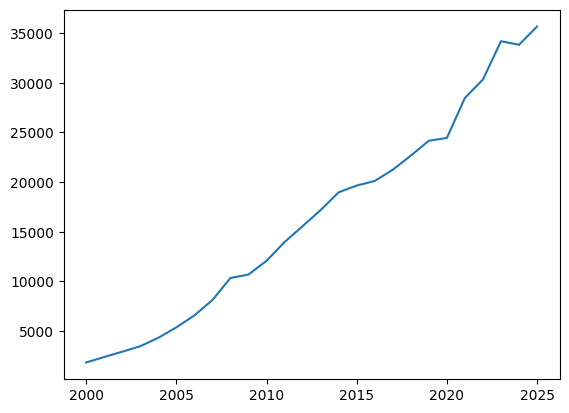

In [3]:
df = pd.read_excel("Oborot_11-2024.xls", sheet_name="3")
df = df[df[df.columns[0]].notna()]
df = df[df[df.columns[0]].str.contains("область|г.*Москва|г.*Санкт", regex=True)]
df = df[df[df.columns[0]].str.contains("округ") == False]
df.replace("-", 0, inplace=True)
df.columns = ["Округ"] + [str(i) for i in range(2000, 2024)]
df[[str(i) for i in range(2000, 2024)]] = df[[str(i) for i in range(2000, 2024)]] / 1000
X = np.array([[i - 2000, (i-2000)**2] for i in range(2000, 2024)])
Y = np.array([np.array([df[df[df.columns[0]]==i][j].to_numpy()[0] for j in df.columns[1::]]) for i in df[df.columns[0]]])
lin_arr = [LinearRegression().fit(X, i) for i in Y]
df["2024"] = np.array([i.predict(np.array([[24, 24**2]])) for i in lin_arr])
df["2025"] = np.array([i.predict(np.array([[25, 25**2]])) for i in lin_arr])
df["2026"] = np.array([i.predict(np.array([[26, 26**2]])) for i in lin_arr])
df["2027"] = np.array([i.predict(np.array([[27, 27**2]])) for i in lin_arr])
df["2028"] = np.array([i.predict(np.array([[28, 28**2]])) for i in lin_arr])


df[df.columns[1::]] = df[df.columns[1::]].astype("float64")

s = [sum(df[df.columns[i-1999]]) for i in range(2000, 2026)]
plt.plot([i for i in range(2000, 2026)], s)


In [4]:
def decypher(excel_file, sheet_name):
    l = pd.read_excel(excel_file, sheet_name=sheet_name)
    l = l[l[l.columns[0]].notna()]
    l = l[l[l.columns[0]].str.contains("область|г.*Москва|г.*Санкт", regex=True)]
    l = l[l[l.columns[0]].str.contains("округ") == False]
    l.replace("-", 0, inplace=True)
    l.columns = ["Округ"] + [str(i) for i in range(2017, 2024)]
    X = np.array([[i - 2016, (i - 2016) ** 2] for i in range(2017, 2024)])
    Y = np.array([np.array([ 
        l[l[l.columns[0]]==i][j].to_numpy()[0]
        for j in l.columns[1::]])
        for i in l[l.columns[0]]])
    lin_arr = [LinearRegression().fit(X, i) for i in Y]
    l["2024"] = np.array([i.predict(np.array([[8, 8**2]])) for i in lin_arr])
    l["2025"] = np.array([i.predict(np.array([[9, 9**2]])) for i in lin_arr])
    l["2026"] = np.array([i.predict(np.array([[10, 10**2]])) for i in lin_arr])
    l["2027"] = np.array([i.predict(np.array([[11, 11**2]])) for i in lin_arr])
    l["2028"] = np.array([i.predict(np.array([[12, 12**2]])) for i in lin_arr])
    l[l.columns[1::]] = l[l.columns[1::]].astype("float64") * df[df.columns[17:29]].to_numpy() / 100
    s = np.array([sum(l[l.columns[i-2016]]) for i in range(2017, 2029)])
    print(*s)
    print(s[-1])
    return (l, s)


In [5]:
def decypher1(excel_file, sheet_name):
    l = pd.read_excel(excel_file, sheet_name=sheet_name)
    l = l[l[l.columns[0]].notna()]
    l = l[l[l.columns[0]].str.contains("область|г.*Москва|г.*Санкт", regex=True)]
    l = l[l[l.columns[0]].str.contains("округ") == False]
    l.replace("-", 0, inplace=True)
    l.columns = ["Округ"] + [str(i) for i in range(2017, 2024)]
    X = np.array([[i - 2016] for i in range(2017, 2024)])
    Y = np.array([np.array([ 
        l[l[l.columns[0]]==i][j].to_numpy()[0]
        for j in l.columns[1::]])
        for i in l[l.columns[0]]])
    lin_arr = [LinearRegression().fit(X, i) for i in Y]
    l["2024"] = np.array([i.predict(np.array([[8]])) for i in lin_arr])
    l["2025"] = np.array([i.predict(np.array([[9]])) for i in lin_arr])
    l["2026"] = np.array([i.predict(np.array([[10]])) for i in lin_arr])
    l["2027"] = np.array([i.predict(np.array([[11]])) for i in lin_arr])
    l["2028"] = np.array([i.predict(np.array([[12]])) for i in lin_arr])
    l[l.columns[1::]] = l[l.columns[1::]].astype("float64") * df[df.columns[17:29]].to_numpy() / 100
    s = np.array([sum(l[l.columns[i-2016]]) for i in range(2017, 2029)])
    print(*s)
    print(s[-1])
    return (l, s)

In [6]:
cl, cs = decypher("Neprod_tov.xlsx", "Одежда")

1489.3475521399998 1508.7409275799998 1678.7651065999999 1702.2413957999997 2045.79603868631 2575.492894512127 2733.684784168473 3505.1728129481494 3809.0406361734927 4438.945872108295 5170.621904211835 6012.224571635888
6012.224571635888


In [7]:
gl, gs = decypher1("Neprod_tov.xlsx", "Галантерейные изделия") # Апроксимация второго порядка провоцирует обрушение рынка на стыке 27 и 28, возьмем линию тренда

/tmp/ipykernel_3433/2635998624.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  l.replace("-", 0, inplace=True)


50.12135998000001 37.47551739 44.58438667 42.759561130000016 39.942470138144124 56.9718140745098 51.10875868331292 54.615039144324015 51.39619451382423 51.584258338563096 51.591177212183375 51.411000252905254
51.411000252905254


In [8]:
col, cos = decypher("Neprod_tov.xlsx", "Косметические средства")

1232.4702361799998 1291.3969072400005 1360.4001091400003 1496.0876241600001 1290.1441330298478 1874.40678960176 1904.779332641035 2281.9194211743225 2389.6565974544465 2688.169600069698 3037.245753707497 3441.964719629222
3441.964719629222


In [9]:
X = np.array([i for i in range(2017, 2029)])


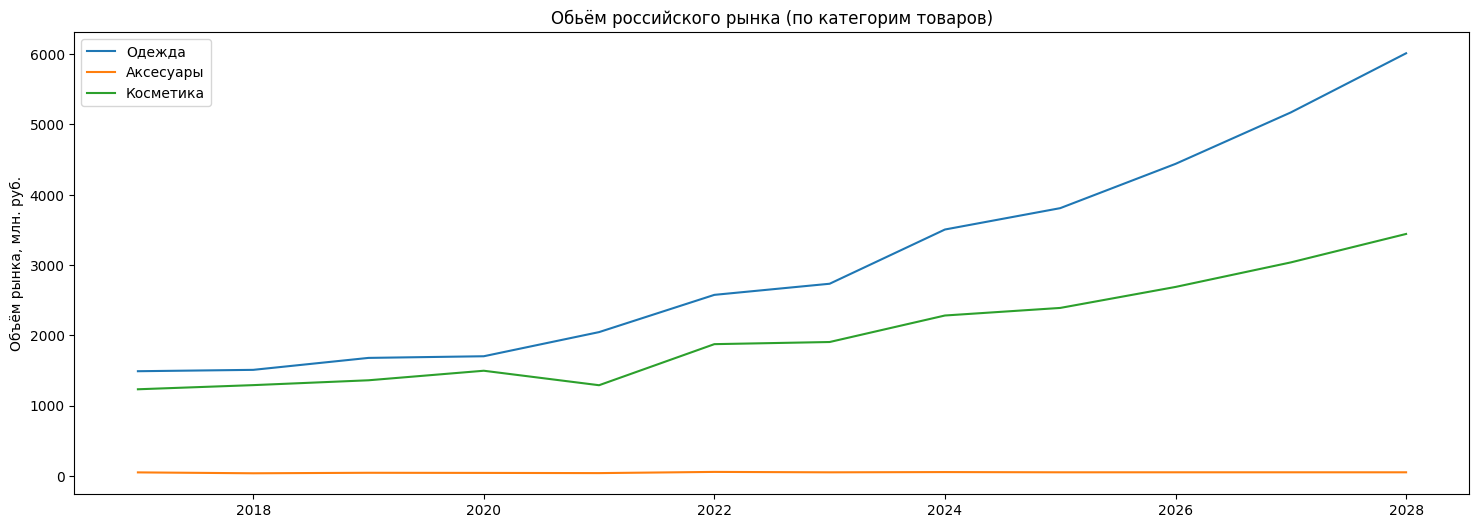

In [10]:
ax = plt.figure(figsize=(18, 6))

plt.plot(X, cs, label="Одежда")
plt.plot(X, gs, label="Аксесуары")
plt.plot(X, cos, label="Косметика")

plt.legend()

plt.ylabel("Объём рынка, млн. руб.")
plt.title("Обьём российского рынка (по категорим товаров)")

plt.show()

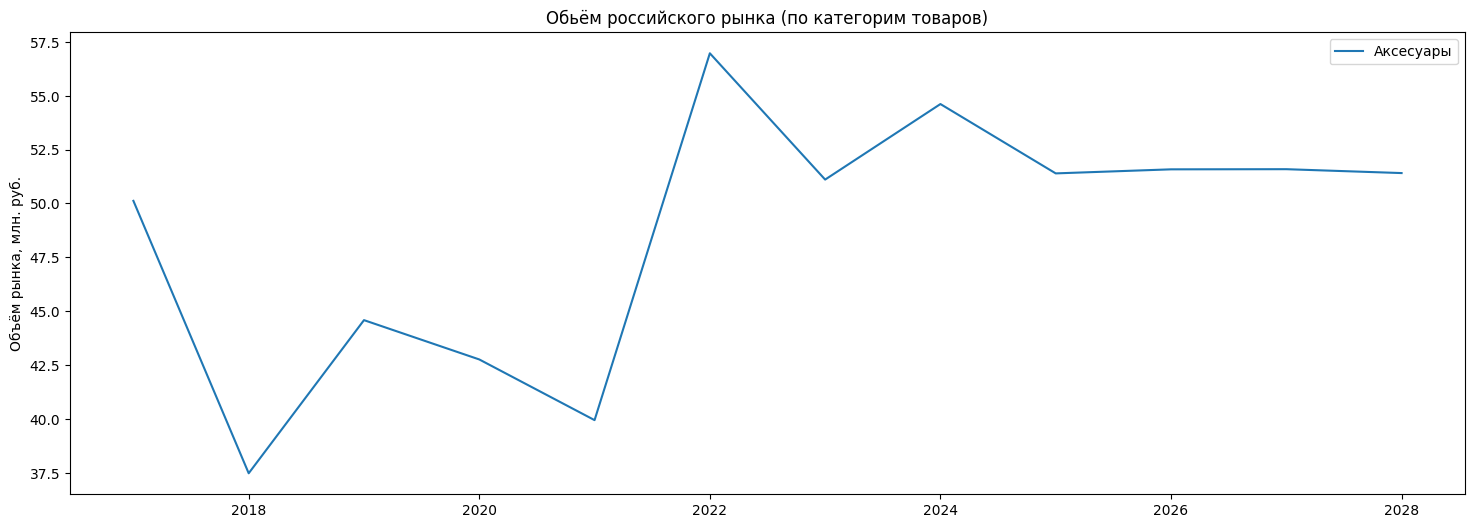

In [11]:
ax = plt.figure(figsize=(18, 6))

plt.plot(X, gs, label="Аксесуары")

plt.legend()

plt.ylabel("Объём рынка, млн. руб.")
plt.title("Обьём российского рынка (по категорим товаров)")

plt.show()

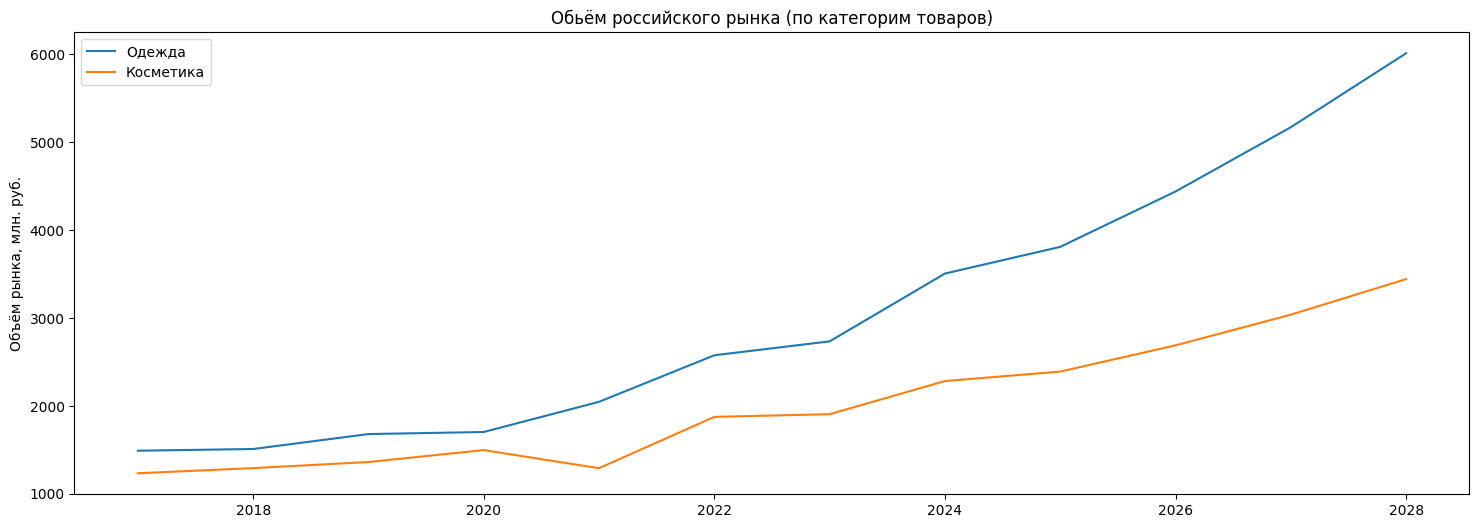

In [12]:
ax = plt.figure(figsize=(18, 6))

plt.plot(X, cs, label="Одежда")
plt.plot(X, cos, label="Косметика")

plt.legend()

plt.ylabel("Объём рынка, млн. руб.")
plt.title("Обьём российского рынка (по категорим товаров)")

plt.show()

In [13]:
print("Одежда: ", cs[-1], (cs[-1]-cs[-2]), cs[-4:-1], "\n")
print("Косметика: ", cos[-1], (cos[-1]-cos[-2]), cos[-4:-1], "\n")
print("Аксесуары: ", gs[-1], (gs[-1]-gs[-2]), gs[-4:-1], "\n")


Одежда:  6012.224571635888 841.6026674240538 [3809.04063617 4438.94587211 5170.62190421] 

Косметика:  3441.964719629222 404.71896592172516 [2389.65659745 2688.16960007 3037.24575371] 

Аксесуары:  51.411000252905254 -0.18017695927812127 [51.39619451 51.58425834 51.59117721] 



In [14]:
ew = pd.ExcelWriter("Анализ_объемов_рынков.xlsx")
df.to_excel(ew, sheet_name="Общий объем российского рынка (млн. руб)")
cl.to_excel(ew, sheet_name="Объем российского рынка одежды (млн. руб)")
col.to_excel(ew, sheet_name="Объем российского рынка косметики (млн. руб)")
gl.to_excel(ew, sheet_name="Объем российского рынка аксесуаров (галантерейной продукции) (млн. руб)")

ew.close()


/home/elgrush/.local/lib/python3.10/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
